# **SIOC 221A - Analysis of Physical Oceanographic Data (A) - Problem 5 - Midterm** 

# Caique Dias Luko 

## I certify that this represents my own work and that I have not worked with classmates or other individuals to complete this assignment.

### For this problem set we will use three wind data records from the Tropical Atmosphere Ocean Project:

### https://dods.ndbc.noaa.gov/thredds/fileServer/oceansites/DATA/T8S110W/OS_T8S110W_DM134A-20150425_D_WIND_10min.nc

### https://dods.ndbc.noaa.gov/thredds/fileServer/oceansites/DATA/T8S110W/OS_T8S110W_DM183A-20160321_D_WIND_10min.nc

### https://dods.ndbc.noaa.gov/thredds/fileServer/oceansites/DATA/T8S110W/OS_T8S110W_DM231A-20170606_D_WIND_10min.nc

### 1. Make a preliminary assessment of the data. First, plot time series of the total wind speed (“WSPD”), zonal wind (“UWND”), and meridional wind (“VWND”). What is the time interval between data points? What is the time gap between the data files? How are gaps in the data handled?

In [1]:
def GetTAOPData(file):

    # Important packages
    import netCDF4 as nc              # Read nc files
    import datetime                   # Manage time vectors
    import pandas as pd               # Useful to work with DataFrames and also to manage time
    import numpy as np                # Using arrays
    
    # Loading time
    dat = nc.Dataset(file)
    time = dat['TIME'][:]
    # Converting time vector
    timev = [str(datetime.datetime(1950,1,1)+datetime.timedelta(days=d)) for d in time]
    timev = pd.to_datetime(timev)
    # Loading wind data
    wspd = dat['WSPD'][:,0]
    uwnd = dat['UWND'][:,0]
    vwnd = dat['VWND'][:,0]
        
    df = pd.DataFrame({'wspd':wspd.data,'uwnd':uwnd.data,'vwnd':vwnd.data})
    df.index = timev # Indexing DataFrame with timev
                
    return df 

import numpy as np
import pandas as pd

# Directory 
file1 = '/home/caique/Documentos/PhD_Courses/SIOC221A_DATA1/Homeworks/data/HW5_data/OS_T8S110W_DM134A-20150425_D_WIND_10min.nc'
file2 = '/home/caique/Documentos/PhD_Courses/SIOC221A_DATA1/Homeworks/data/HW5_data/OS_T8S110W_DM183A-20160321_D_WIND_10min.nc'
file3 = '/home/caique/Documentos/PhD_Courses/SIOC221A_DATA1/Homeworks/data/HW5_data/OS_T8S110W_DM231A-20170606_D_WIND_10min.nc'

# Loading 
taop1=GetTAOPData(file1)
taop2=GetTAOPData(file2)
taop3=GetTAOPData(file3)

TAOP = pd.concat((taop1,taop2,taop3))

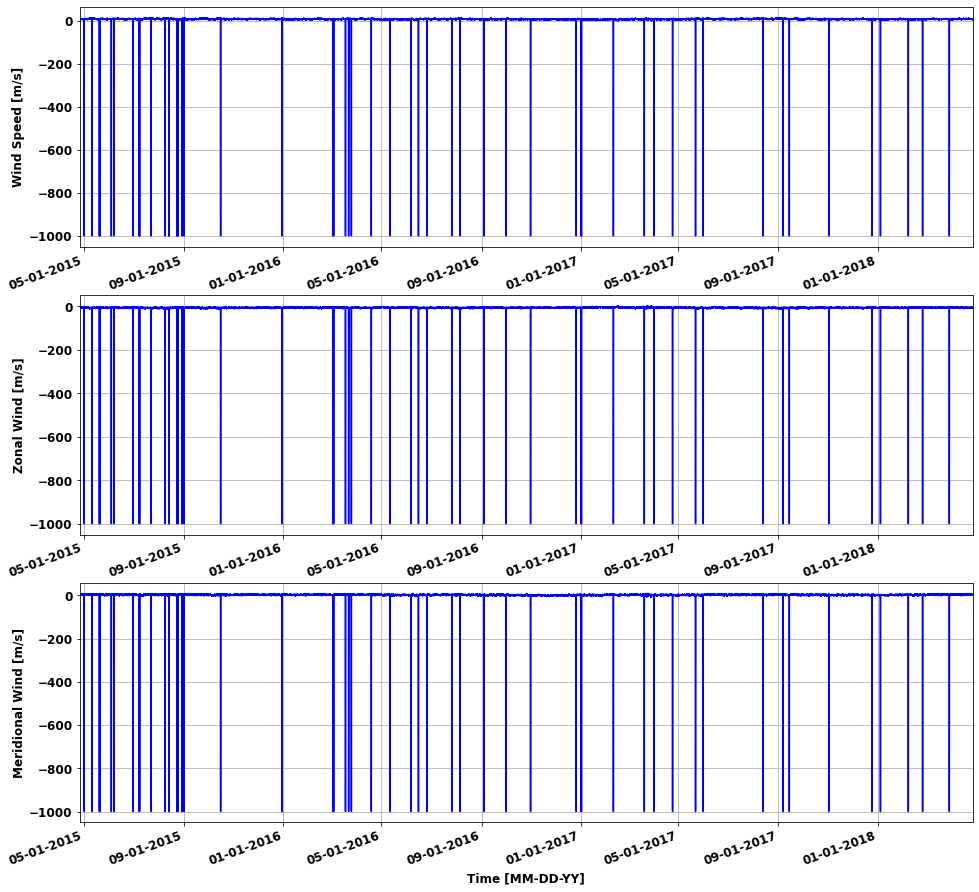

In [2]:
# Defining function to plot the data
def subplot_time(timev,var,varstr,ax,c,labels=None):
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    if labels!=None:
        plt.plot(timev,var,label=labels,color=c)
        plt.legend(loc='best')
    else:
        plt.plot(timev,var,color=c)
    plt.xlim(timev[0],timev[-1])
    plt.xlabel('Time [MM-DD-YY]',fontsize=12,weight='bold')
    plt.ylabel(varstr,fontsize=12,weight='bold')
    # Setting datetick format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=20, horizontalalignment='right') 

# Plotting packages
import matplotlib.pyplot as plt   # Plots
from matplotlib import rc         # Figure fonts

#Creating plot
fig =plt.figure(figsize=(16,15))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

ax1 = fig.add_subplot(311)
subplot_time(TAOP.index,TAOP.wspd,'Wind Speed [m/s]',ax1,c='blue')
plt.grid()

ax1 = fig.add_subplot(312)
subplot_time(TAOP.index,TAOP.uwnd,'Zonal Wind [m/s]',ax1,c='blue')
plt.grid()

ax1 = fig.add_subplot(313)
subplot_time(TAOP.index,TAOP.vwnd,'Meridional Wind [m/s]',ax1,c='blue')
plt.grid()

In [3]:
# Mask
taop1.wspd[np.where(taop1.wspd==-999)[0]]=np.nan
taop2.wspd[np.where(taop2.wspd==-999)[0]]=np.nan
taop3.wspd[np.where(taop3.wspd==-999)[0]]=np.nan

taop1.uwnd[np.where(taop1.uwnd==-999)[0]]=np.nan
taop2.uwnd[np.where(taop2.uwnd==-999)[0]]=np.nan
taop3.uwnd[np.where(taop3.uwnd==-999)[0]]=np.nan

taop1.vwnd[np.where(taop1.vwnd==-999)[0]]=np.nan
taop2.vwnd[np.where(taop2.vwnd==-999)[0]]=np.nan
taop3.vwnd[np.where(taop3.vwnd==-999)[0]]=np.nan


### What is the time interval between data points? What is the time gap between the data files? How are gaps in the data handled? 

In [4]:
print('The time interval of the first record is:  ',(float(np.unique(np.diff(taop1.index))[0])*1e-9)/60,' min')
print('The time interval of the second record is: ',(float(np.unique(np.diff(taop2.index))[0])*1e-9)/60,' min')
print('The time interval of the third record is:  ',(float(np.unique(np.diff(taop3.index))[0])*1e-9)/60,' min \n')

print('The time interval between the first two files is: ',taop2.index[0]-taop1.index[-1],'hours')
print('The time interval between the last two files is: ',taop3.index[0]-taop2.index[-1],'hours')


The time interval of the first record is:   10.0  min
The time interval of the second record is:  10.0  min
The time interval of the third record is:   10.0  min 

The time interval between the first two files is:  0 days 09:30:00 hours
The time interval between the last two files is:  0 days 22:10:00 hours


The gaps within each record (NaNs) are filled with linear interpolation.

### Since there are some gaps in the data, for the rest of this problem set, you will need to fill the gaps. Fill the gaps in each record by linear interpolation. (You can do this with the Matlab function interp1 or xarray.interpolate na in python.) Do not try to interpolate across the gaps between the 3 records, since the gaps are several hours long.

In [5]:
# Interpolating with pandas.DataFrame.interpolate
taop1n = taop1.interpolate(method='linear')
taop2n = taop2.interpolate(method='linear')
taop3n = taop3.interpolate(method='linear')

TAOP = pd.concat((taop1,taop2,taop3))

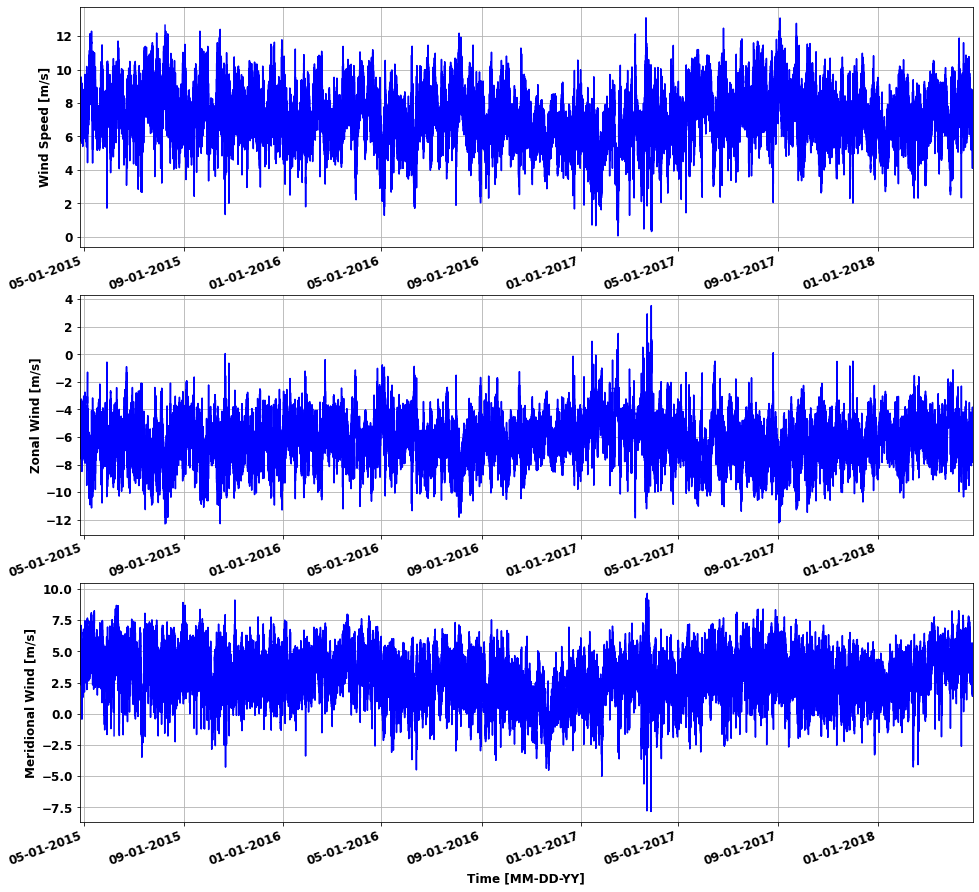

In [6]:
# Plotting after masking and interpolating gaps
fig =plt.figure(figsize=(16,15))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

ax1 = fig.add_subplot(311)
subplot_time(TAOP.index,TAOP.wspd,'Wind Speed [m/s]',ax1,c='blue')
plt.grid()

ax1 = fig.add_subplot(312)
subplot_time(TAOP.index,TAOP.uwnd,'Zonal Wind [m/s]',ax1,c='blue')
plt.grid()

ax1 = fig.add_subplot(313)
subplot_time(TAOP.index,TAOP.vwnd,'Meridional Wind [m/s]',ax1,c='blue')
plt.grid()


### 2. Segment the data into 60-day segments with 50% overlap. How many segments do you have for each of the data files? How many points are in each segment? Determine the frequencies (in cycles per day) that you will be able to analyze when you Fourier transform the data.



In [7]:
tstepd = 10./(60*24)
tday1 = np.arange(0,taop1n.wspd.shape[0]*tstepd+tstepd,tstepd)
tday2 = np.arange(0,taop2n.wspd.shape[0]*tstepd+tstepd,tstepd)
tday3 = np.arange(0,taop3n.wspd.shape[0]*tstepd+tstepd,tstepd)

def seg60day(df,tday,tstepd):
    segs=np.arange(0,int((tday[-1]/60 -1)//0.5),1)
    tdays = np.arange(0,60+tstepd,tstepd)
    blank = np.ones((segs.shape[0],tdays.shape[0]))*np.nan
    import xarray as xr
    xr1 = xr.Dataset({"wspd": (("Segment", "Time"),blank.copy()),"uwnd": (("Segment", "Time"),blank.copy()),"vwnd": (("Segment", "Time"),blank.copy())},coords={"Segment":segs,"Time": tdays})
    n30=np.where(tdays==30)[0][0]
    for i in np.array(xr1.Segment):
        xr1.wspd[i] = np.array(df.wspd[i*n30:((i+2)*n30)+1])
        xr1.uwnd[i] = np.array(df.uwnd[i*n30:((i+2)*n30)+1])
        xr1.vwnd[i] = np.array(df.vwnd[i*n30:((i+2)*n30)+1])
        
    return xr1

xr1 = seg60day(taop1n,tday1,tstepd)
xr2 = seg60day(taop2n,tday2,tstepd)
xr3 = seg60day(taop3n,tday3,tstepd)

print('For all files, the number of points in each segment is: ',xr1.Time.shape[0])
print('For the first file, the number of segments is:          ',xr1.Segment.shape[0])
print('For the second file, the number of segments is:         ',xr2.Segment.shape[0])
print('For the third file, the number of segments is:          ',xr3.Segment.shape[0])
print('\nThe highest frequency that we are able to resolve (Nyquist frequency) is:  ',1./2./tstepd,' cycles/day')
print('The lowest frequency that we are able to resolve (Fundamental frequency) is: ',round(1./(xr1.Time.shape[0]*tstepd),4),' cycles/day')


For all files, the number of points in each segment is:  8641
For the first file, the number of segments is:           9
For the second file, the number of segments is:          12
For the third file, the number of segments is:           8

The highest frequency that we are able to resolve (Nyquist frequency) is:   72.0  cycles/day
The lowest frequency that we are able to resolve (Fundamental frequency) is:  0.0167  cycles/day


### 3. Compute and plot spectra using 3 different approaches, for the 2015 wind speed record only. Compute the spectrum from the raw data, from the detrended data, and from the detrended data with a Hanning window applied. How does detrending and windowing alter the spectrum in this case?

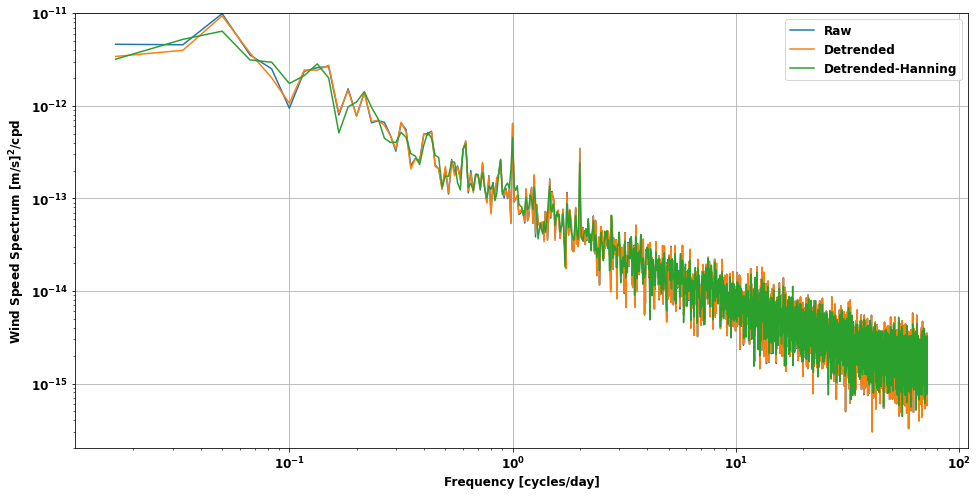

In [8]:
def compspectrum(data,tday,tstep,demean=True,detren=False,hanning=False):
    # data is an array with the data
    # tday is the time vector in days
    # tstep should be in days

    import numpy as np
    import xarray as xr
    from scipy.signal import detrend

    # Segmenting
    segs=np.arange(0,int((tday[-1]/60 -1)//0.5),1)
    tdays = np.arange(0,60+tstepd,tstepd)
    blank = np.ones((segs.shape[0],tdays.shape[0]))*np.nan

    # Creating xarray with dimensions segment and time 
    xr1 = xr.Dataset({"variable": (("Segment", "Time"),blank.copy())},coords={"Segment":segs,"Time": tdays})
    n30=np.where(tdays==30)[0][0]
    for i in np.array(xr1.Segment):
        xr1.variable[i] = np.array(data[i*n30:((i+2)*n30)+1])

    data = xr1.variable.copy()
    
    # Removing the mean
    if demean == True:
        data = data-data.mean(dim='Time')
        
    # Computing frequencies
    freq = np.fft.fftshift(np.fft.fftfreq(data.shape[1],d=tstep))
    # Indexes of positive freqs
    idx = np.where(freq>0)[0]
    freq=freq[idx]
    
    if detren==False and hanning==False:
        ffts = np.fft.fftshift(np.fft.fft(data),axes=1)[:,idx]
    if detren==True and hanning ==False:
        ffts = np.fft.fftshift(np.fft.fft(detrend(data)),axes=1)[:,idx]
    if detren==True and hanning == True:
        hann = np.hanning(data.shape[1])
        fac = np.sqrt(np.nanmean(hann**2)) 
        hann = hann/fac # Normalizing to get <hann**2>=1
        Hann,_ = np.meshgrid(hann,data.Segment)
        ffts = np.fft.fftshift(np.fft.fft(detrend(data)*Hann),axes=1)[:,idx]

    ffts = abs(ffts)/data.shape[1]**2 
    ffts = ffts**2/(1/tstep) 

    return np.nanmean(ffts,axis=0),freq,segs.shape[0]


spectrum,freq,segs = compspectrum(np.array(taop1n.wspd),tday1,tstepd,demean=True,detren=False,hanning=False)
spectrumd,freq,segs = compspectrum(np.array(taop1n.wspd),tday1,tstepd,demean=True,detren=True,hanning=False)
spectrumh,freq,segs = compspectrum(np.array(taop1n.wspd),tday1,tstepd,demean=True,detren=True,hanning=True)

plt.figure(figsize=(16,8))
plt.loglog(freq,spectrum,label='Raw')
plt.loglog(freq,spectrumd,label='Detrended')
plt.loglog(freq,spectrumh,label='Detrended-Hanning')
plt.legend(loc='best')
plt.xlabel('Frequency [cycles/day]',weight='bold',fontsize=12)
plt.ylabel('Wind Speed Spectrum [m/s]$^2$/cpd',weight='bold',fontsize=12)
plt.ylim(2e-16,1e-11)
plt.grid()



Detrending reduces the energy at the lowest frequencies. As for the hanning window, it reduces the amplitude of some maxima and minima throughout the spectrum. Probably, this happens due to the correction of leakage in the raw spectrum. 

### 4. Add uncertainty estimates to the 2015 wind speed spectra. Indicate whether you think the uncertainty should differ for the 3 cases.

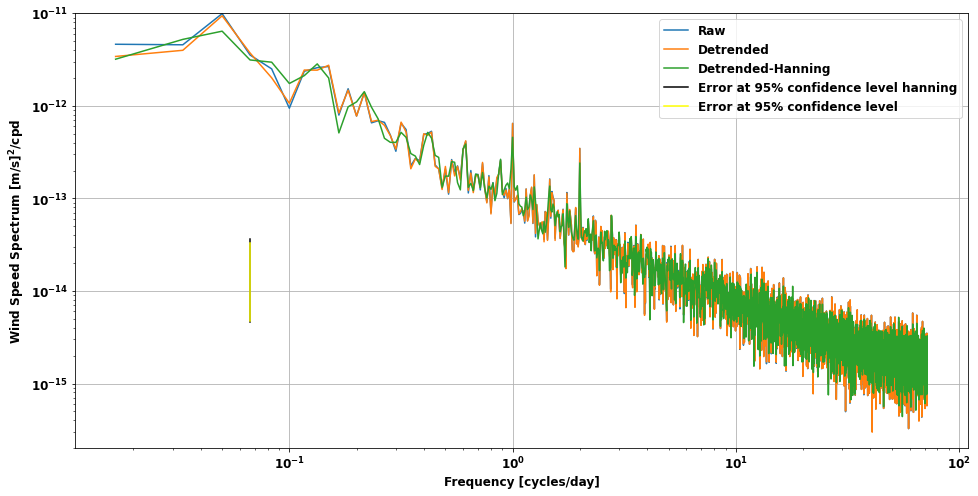

In [9]:
from scipy.stats.distributions import chi2

df= segs 
err_low = df/chi2.ppf(1-.05/2,df)
err_high = df/chi2.ppf(.05/2,df)

# For the hanning window we will recover about 90% of the stability lost due to tapering
dfh = df*0.9
err_lowh = dfh/chi2.ppf(1-.05/2,dfh)
err_highh = dfh/chi2.ppf(.05/2,dfh)

plt.figure(figsize=(16,8))
plt.loglog(freq,spectrum,label='Raw')
plt.loglog(freq,spectrumd,label='Detrended')
plt.loglog(freq,spectrumh,label='Detrended-Hanning')
plt.semilogy([freq[3],freq[3]],np.array([err_lowh,err_highh])*1e-14,color='black',label='Error at 95% confidence level hanning')
plt.semilogy([freq[3],freq[3]],np.array([err_low,err_high])*1e-14,color='yellow',label='Error at 95% confidence level')
plt.legend(loc='best')
plt.xlabel('Frequency [cycles/day]',weight='bold',fontsize=12)
plt.ylabel('Wind Speed Spectrum [m/s]$^2$/cpd',weight='bold',fontsize=12)
plt.ylim(2e-16,1e-11)
plt.grid()



The errorbar at the 95% confidence level changes for the hanning window because part of the degrees of freedom are lost when tapering. 

### 5. Compute the wind speed spectrum using data from all three data files. Do this just using the detrended and Hanning-windowed records. Be sure to compute the uncertainty estimate. Overlay the multi-year spectrum over the 2015 spectrum you computed earlier. How do they differ? Why? Can the differences be explained by differences in the uncertainties?

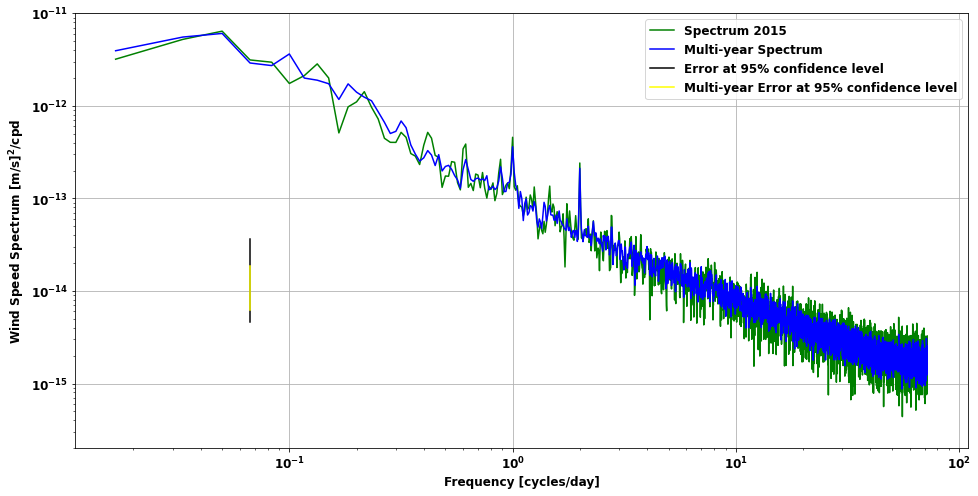

In [10]:
spec1,freq1,segs1 = compspectrum(np.array(taop1n.wspd),tday1,tstepd,demean=True,detren=True,hanning=True)
spec2,freq2,segs2 = compspectrum(np.array(taop2n.wspd),tday2,tstepd,demean=True,detren=True,hanning=True)
spec3,freq3,segs3 = compspectrum(np.array(taop3n.wspd),tday3,tstepd,demean=True,detren=True,hanning=True)

df1= (segs1)*0.9 
err_low1 = df1/chi2.ppf(1-.05/2,df1)
err_high1 = df1/chi2.ppf(.05/2,df1)

multspec=(spec1+spec2+spec3)/3

dfm= ((segs1+segs2+segs3))*0.9 
err_lowm = dfm/chi2.ppf(1-.05/2,dfm)
err_highm = dfm/chi2.ppf(.05/2,dfm)

plt.figure(figsize=(16,8))
plt.loglog(freq1,spec1,color='green',label='Spectrum 2015')
plt.loglog(freq1,multspec,color='blue',label='Multi-year Spectrum')
plt.semilogy([freq1[3],freq1[3]],np.array([err_low1,err_high1])*1e-14,color='black',label='Error at 95% confidence level')
plt.semilogy([freq1[3],freq1[3]],np.array([err_lowm,err_highm])*1e-14,color='yellow',label='Multi-year Error at 95% confidence level')
plt.legend(loc='best')
plt.xlabel('Frequency [cycles/day]',weight='bold',fontsize=12)
plt.ylabel('Wind Speed Spectrum [m/s]$^2$/cpd',weight='bold',fontsize=12)
plt.ylim(2e-16,1e-11)
plt.grid()


The multi-year spectrum is smoother and has a smaller error bar. This happens because more segments are added to the mean. The degrees of freedom increase, the spectrum becomes less noisy, and the error is smaller.

### 6. Compare the spectra for wind speed, zonal wind, and meridional wind. Use all 3 data files, and be sure to detrend and Hanning window. Examine the peaks at the diurnal and semi-diurnal frequencies. How do they differ? Are the differences statistically significant? What do you hypothesize might account for differences?

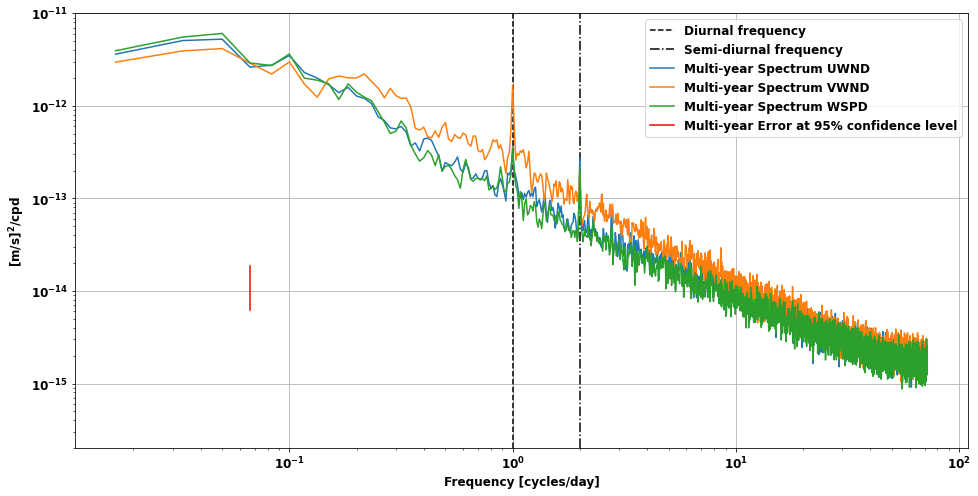

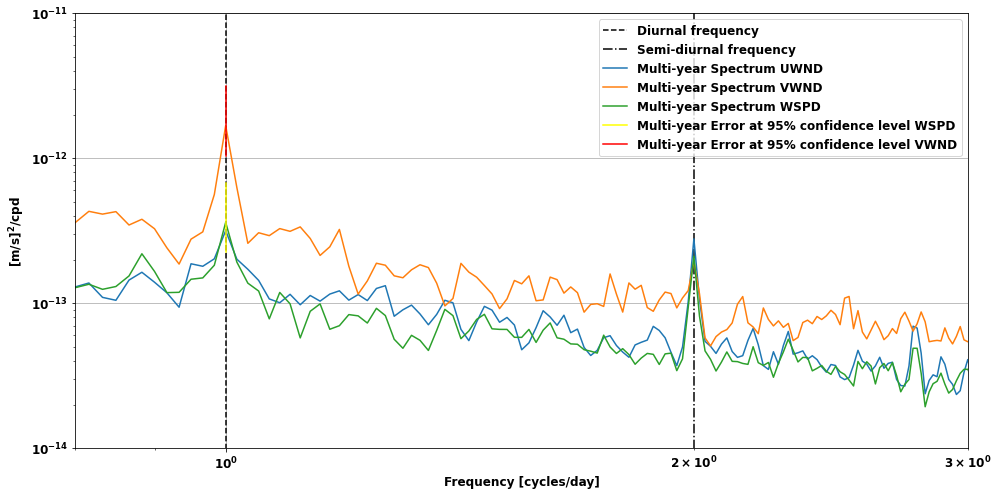

In [11]:
spec1w,freq1,segs1 = compspectrum(np.array(taop1n.wspd),tday1,tstepd,demean=True,detren=True,hanning=True)
spec2w,freq2,segs2 = compspectrum(np.array(taop2n.wspd),tday2,tstepd,demean=True,detren=True,hanning=True)
spec3w,freq3,segs3 = compspectrum(np.array(taop3n.wspd),tday3,tstepd,demean=True,detren=True,hanning=True)
multspecw=(spec1w+spec2w+spec3w)/3

spec1u,freq1,segs1 = compspectrum(np.array(taop1n.uwnd),tday1,tstepd,demean=True,detren=True,hanning=True)
spec2u,freq2,segs2 = compspectrum(np.array(taop2n.uwnd),tday2,tstepd,demean=True,detren=True,hanning=True)
spec3u,freq3,segs3 = compspectrum(np.array(taop3n.uwnd),tday3,tstepd,demean=True,detren=True,hanning=True)
multspecu=(spec1u+spec2u+spec3u)/3

spec1v,freq1,segs1 = compspectrum(np.array(taop1n.vwnd),tday1,tstepd,demean=True,detren=True,hanning=True)
spec2v,freq2,segs2 = compspectrum(np.array(taop2n.vwnd),tday2,tstepd,demean=True,detren=True,hanning=True)
spec3v,freq3,segs3 = compspectrum(np.array(taop3n.vwnd),tday3,tstepd,demean=True,detren=True,hanning=True)
multspecv=(spec1v+spec2v+spec3v)/3


dfm= ((segs1+segs2+segs3))*0.9 
err_lowm = dfm/chi2.ppf(1-.05/2,dfm)
err_highm = dfm/chi2.ppf(.05/2,dfm)

plt.figure(figsize=(16,8))
plt.plot([1,1],[2e-16,1e-11],linestyle='--',color='k',label='Diurnal frequency')
plt.plot([2,2],[2e-16,1e-11],linestyle='-.',color='k',label='Semi-diurnal frequency')
plt.loglog(freq1,multspecu,label='Multi-year Spectrum UWND')
plt.loglog(freq1,multspecv,label='Multi-year Spectrum VWND')
plt.loglog(freq1,multspecw,label='Multi-year Spectrum WSPD')
plt.semilogy([freq1[3],freq1[3]],np.array([err_lowm,err_highm])*1e-14,color='red',label='Multi-year Error at 95% confidence level')
plt.legend(loc='best')
plt.xlabel('Frequency [cycles/day]',weight='bold',fontsize=12)
plt.ylabel('[m/s]$^2$/cpd',weight='bold',fontsize=12)
plt.ylim(2e-16,1e-11)
plt.grid()

plt.figure(figsize=(16,8))
plt.plot([1,1],[2e-16,1e-11],linestyle='--',color='k',label='Diurnal frequency')
plt.plot([2,2],[2e-16,1e-11],linestyle='-.',color='k',label='Semi-diurnal frequency')
plt.loglog(freq1,multspecu,label='Multi-year Spectrum UWND')
plt.loglog(freq1,multspecv,label='Multi-year Spectrum VWND')
plt.loglog(freq1,multspecw,label='Multi-year Spectrum WSPD')
plt.semilogy([1,1],np.array([err_lowm,err_highm])*multspecw[59],color='yellow',label='Multi-year Error at 95% confidence level WSPD')
plt.semilogy([1,1],np.array([err_lowm,err_highm])*multspecv[59],color='red',label='Multi-year Error at 95% confidence level VWND')
plt.legend(loc='best')
plt.xlabel('Frequency [cycles/day]',weight='bold',fontsize=12)
plt.ylabel('[m/s]$^2$/cpd',weight='bold',fontsize=12)
plt.ylim(1e-14,1e-11)
plt.xlim(0.8,3)
plt.grid()



The VWND spectrum is more energetic on intermediate frequencies.

At the diurnal frequencies, we observe more energy at the VWND spectrum. The difference between VWND and UWND/WSPD is statistically significant because the error bars do not overlap. As for the semi-diurnal frequency, all spectra have roughly the same energy, and the difference is no statiscally significant.

The difference in the diurnal peak, must indicate that there is a diurnal breeze that occurs preferentially in the meridional direction.

### 7. Push a fully commented function to the GitHub repository. It should have input arguments of the data and sample interval, and optional arguments for whether to detrend and demean and whether to apply the Hanning window.

In [12]:
# The function is this one. It has been used in the code and it was pushed to Github.
def compspectrum(data,tday,tstep,demean=True,detren=False,hanning=False):
    # data is an array with the data
    # tday is the time vector in days
    # tstep should be in days

    import numpy as np
    import xarray as xr
    from scipy.signal import detrend

    # Segmenting
    segs=np.arange(0,int((tday[-1]/60 -1)//0.5),1)
    tdays = np.arange(0,60+tstepd,tstepd)
    blank = np.ones((segs.shape[0],tdays.shape[0]))*np.nan

    # Creating xarray with dimensions segment and time 
    xr1 = xr.Dataset({"variable": (("Segment", "Time"),blank.copy())},coords={"Segment":segs,"Time": tdays})
    n30=np.where(tdays==30)[0][0]
    for i in np.array(xr1.Segment):
        xr1.variable[i] = np.array(data[i*n30:((i+2)*n30)+1])

    data = xr1.variable.copy()
    
    # Removing the mean
    if demean == True:
        data = data-data.mean(dim='Time')
        
    # Computing frequencies
    freq = np.fft.fftshift(np.fft.fftfreq(data.shape[1],d=tstep))
    # Indexes of positive freqs
    idx = np.where(freq>0)[0]
    freq=freq[idx]
    
    if detren==False and hanning==False:
        ffts = np.fft.fftshift(np.fft.fft(data),axes=1)[:,idx]
    if detren==True and hanning ==False:
        ffts = np.fft.fftshift(np.fft.fft(detrend(data)),axes=1)[:,idx]
    if detren==True and hanning == True:
        hann = np.hanning(data.shape[1])
        fac = np.sqrt(np.nanmean(hann**2)) 
        hann = hann/fac # Normalizing to get <hann**2>=1
        Hann,_ = np.meshgrid(hann,data.Segment)
        ffts = np.fft.fftshift(np.fft.fft(detrend(data)*Hann),axes=1)[:,idx]

    ffts = abs(ffts)/data.shape[1]**2 
    ffts = ffts**2/(1/tstep) 

    return np.nanmean(ffts,axis=0),freq,segs.shape[0]
